# Regression
In supervised learning, regression aims at predicting a continous numerical value using one or more independent features as input variables. It finds relationship between dependent variable (target) and independent variables (features). 

Different types of regression:
1. Simple linear regression: assumes there is linear correlation between dependent and independent variables. 
2. Multiple linear regression: extends simple linear regression with multiple independent variables as predictors.
3. Polynomial regression: used when there is non-linear relationship between dependent and independent variables.

This notebook covers only simple and multiple linear regression. 

## Load dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We use **Student Performance** dataset from UCI ML repository. It contains data related to student achievement in secondary education, consisting of two subjects Mathematics (mat) and Portugese (por) language. The data has many features, including:
* Demographic (e.g., `age`, `sex`, `address`)
* Social and academic (e.g., `studytime`, `freetime`, `absences`)
* Grades: `G1` - 1st grade, `G2` - 2nd grade, and `G3` - final grade

For details of dataset information, including its features description, please visit the following website
https://archive.ics.uci.edu/dataset/320/student+performance

In [2]:
studentDf = pd.read_csv('../dataset/student-mat.csv')
studentDf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
studentDf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [4]:
studentDf.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Visualize the data
### Univariate analysis

Plot distribution of numeric features

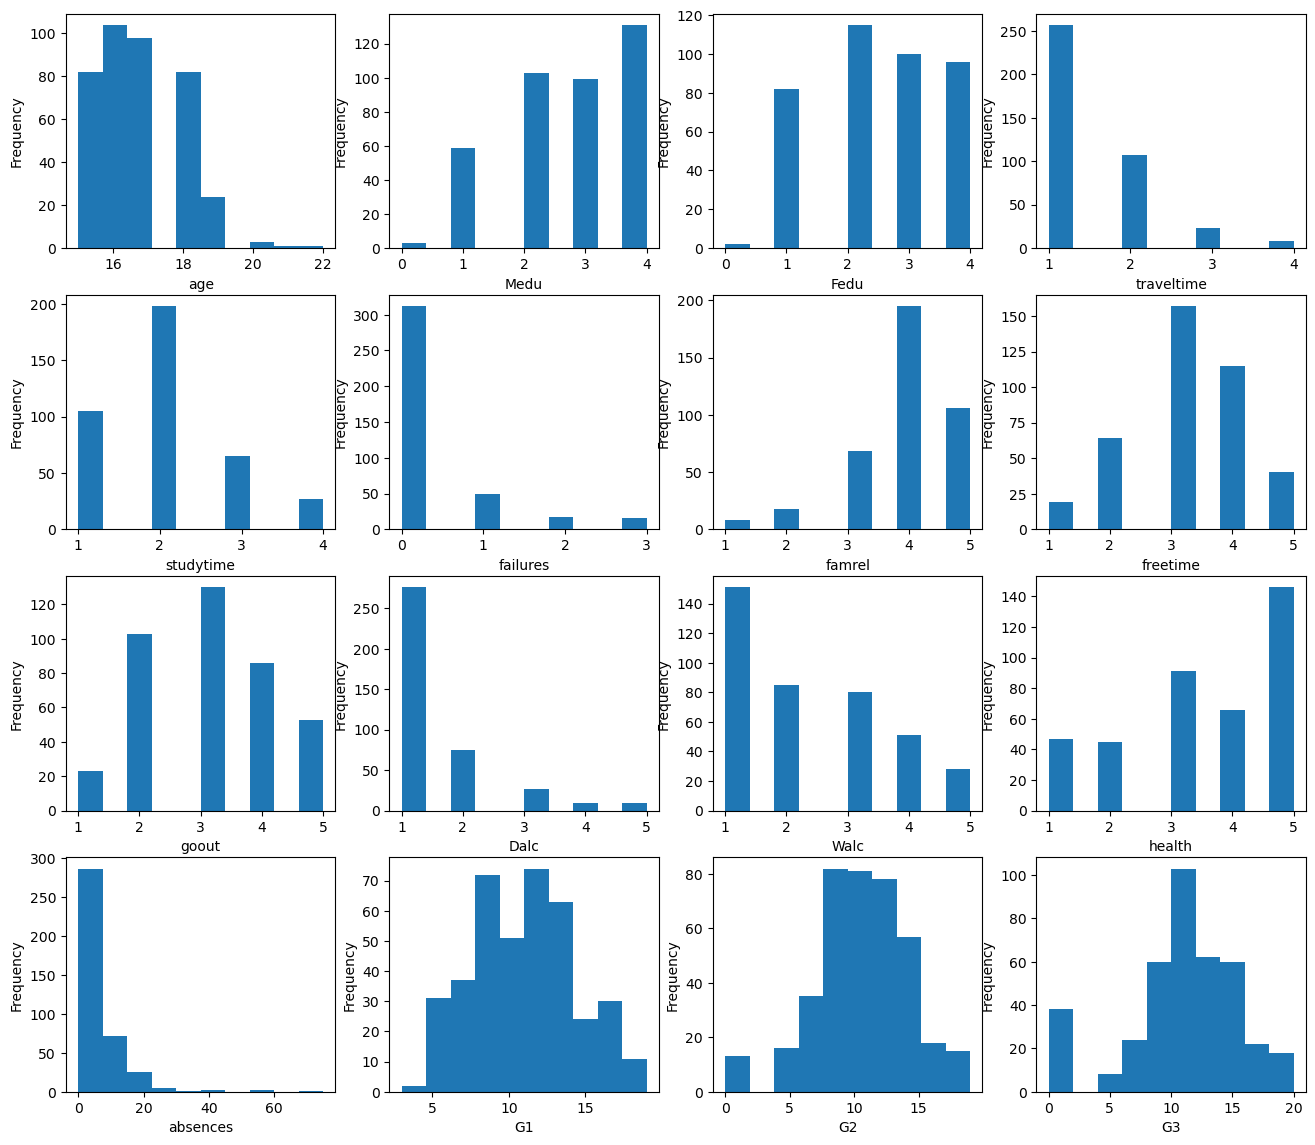

In [5]:
fig = plt.figure(figsize=(16, 14))  
i = 0
for column in studentDf.select_dtypes(include=['number']):
    sub = fig.add_subplot(4, 4, i + 1)
    studentDf[column].plot(kind = 'hist')
    sub.set_xlabel(column)
    i = i + 1

### Correlation plot

<Axes: >

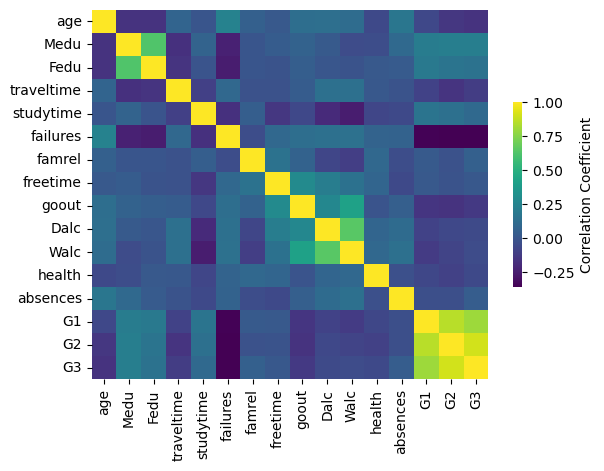

In [6]:
# correlation heat map
sns.heatmap(studentDf.select_dtypes(include=['number']).corr(), annot=False, cmap='viridis', 
            cbar_kws={'label': 'Correlation Coefficient', "shrink": .5})

## Prepare dataset
Define predictor and target variables. Split dataset into train and test set. 

In [7]:
from sklearn.model_selection import train_test_split

X = studentDf['studytime'].to_numpy().reshape(-1, 1) # feature for predictor
y = studentDf['G3'].to_numpy().reshape(-1, 1) # target to predict

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

> Note that we had to perform `reshape` on the input data in order for the Linear Regression package to understand it correctly. Linear Regression expects a 2D-array as an input, where each row of the array corresponds to a vector of input features. In our case, since we have only one input - we need an array with shape N×1, where N is the dataset size.

## Train the linear regression model

In [8]:
from sklearn.linear_model import LinearRegression

# fit the ordinary linear regression (olr) model
olr = LinearRegression()
olr.fit(X_train, y_train)

olr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the model

Text(0, 0.5, 'Predicted G3 score')

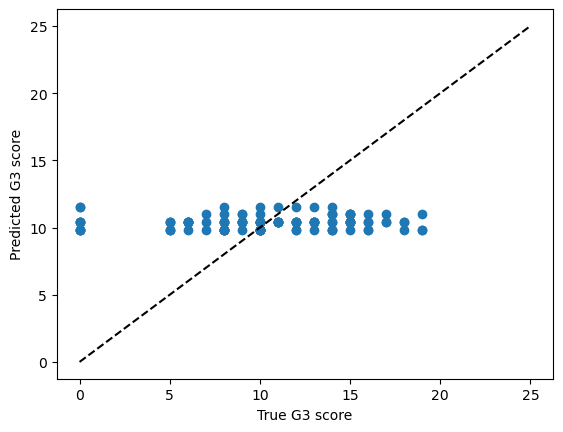

In [9]:
# predict using test dataset
y_pred = olr.predict(X_test)

# plot between true value and predicted value of G3 score
plt.scatter(y_test, y_pred)
plt.plot([0, 25], [0, 25], '--k')
plt.xlabel('True G3 score')
plt.ylabel('Predicted G3 score')

> The selected `studytime` feature does not serve as a good linear relationship predictor for `G3` score. As shown in the plot, regardless the true value of `G3` the predicted values barely change as the actual grade change. This suggest that `studytime` does not capture enough information to predict the `G3` accurately. See further evaluation below.

In [10]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mae/ y_test.mean() *100:.2f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

score = olr.score(X_train,y_train)
print(f'Model determination: {score:.4f}')

MAE: 3.6346
MAPE: 35.22
MSE: 21.8512
RMSE: 4.6745
R² Score: 0.0060
Model determination: 0.0109


### 📊 Interpretation of Results

| Metric | Value | Meaning |
|--------|-------|---------|
| **MAE** | 3.63 | On average, the model's predictions are off by about 3.63 grade points. |
| **MAPE** | 35.22 | The average percentage error is 35.22%, which is quite high. |
| **MSE** | 21.85 | Squared error is high, indicating large deviations. |
| **RMSE** | 4.67 | Root mean squared error confirms the average error magnitude. |
| **R² Score** | 0.006 | The model explains only 0.6% of the variance in `G3`. Very poor fit. |
| **Model Determination** | 0.0109 | Same as R², confirms very weak predictive power. |


---

### 🧠 What This Means?

- Align with the prior plot, **`studytime` alone is a weak predictor** of final grade (`G3`).
- The **high error metrics** (MAE, RMSE, MAPE) suggest the model is not reliable for prediction.
- The R² score is close to zero, meaning the model barely explains any variation in the target.

---

### 🔍 More about R²

**R²** and **model determination** refer to the same metric, reflecting how well the model explains the variance in the target variable (`G3`). 

**Formula**:  
  $$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} $$
where:
  - $ \text{SS}_{\text{res}} $ = sum of squared residuals (errors)
  - $ \text{SS}_{\text{tot}} $ = total sum of squares (variance of the target)

**Interpretation**:
  - R² = 1 → perfect prediction
  - R² = 0 → model does no better than the mean
  - R² < 0 → model is worse than just predicting the mean

As you may notice, the score of **R²** and **model determination** are different. This is because they used different dataset. **R²** was applied for **test data**, while **model determination** was calculated against **training data**. 

- Calculate both are essential for evaluating wheather the model overfits. **R²** score on training will be higher than test in such case.
- **R²** score on test dataset indicates how well the model generalizes to unseen data.

---



## Extract model insights

In [11]:
print(f"Intercept: {olr.intercept_[0]:.2f}")
print(f"Coefficient: {olr.coef_[0][0]:.2f}")

Intercept: 9.28
Coefficient: 0.57


> **Intercept** is the baseline value of the dependent variable when there is no contribution from the predictors.
> The **coefficient is positive**, which makes sense: more study time tends to correlate with better grades, but the effect is small.
> From the both values we can formulate linear model as follows:
> $$ y = 9.28 + 0.57x_1$$
> where $y$ denotes `G3` and $x_1$ refers to `studytime`

## Train with another predictor

In [12]:
X = studentDf['G1'].to_numpy().reshape(-1, 1) # feature for predictor
y = studentDf['G3'].to_numpy().reshape(-1, 1) # target to predict

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the ordinary linear regression (olr) model
olr = LinearRegression()
olr.fit(X_train, y_train)

olr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the model with new predictor

Text(0, 0.5, 'Predicted G3 score')

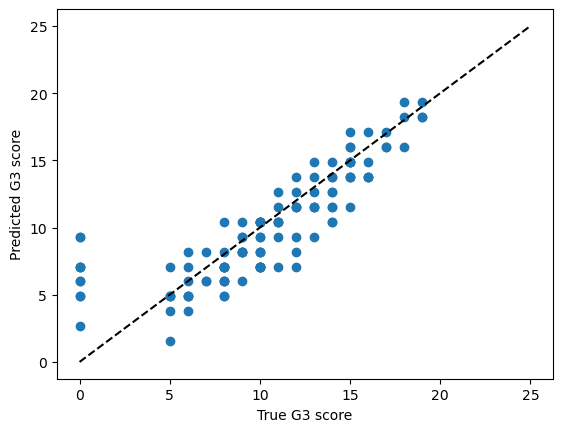

In [13]:
# predict using test dataset
y_pred = olr.predict(X_test)

# plot between true value and predicted value of G3 score
plt.scatter(y_test, y_pred)
plt.plot([0, 25], [0, 25], '--k')
plt.xlabel('True G3 score')
plt.ylabel('Predicted G3 score')

In [14]:
# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mae/ y_test.mean() *100:.2f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

score = olr.score(X_train,y_train)
print(f'Model determination: {score:.4f}')

MAE: 1.8312
MAPE: 17.75
MSE: 6.6593
RMSE: 2.5806
R² Score: 0.6971
Model determination: 0.6165


### 📊 Interpretation of Results

The model now improved with better performance.

| Metric | Value | Meaning |
|--------|-------|---------|
| **MAE** | 1.83 | On average, the model's predictions are off by about 1.83 grade points. |
| **MAPE** | 17.75 | The average percentage error is 17.75%, which is reasonably acceptable. |
| **MSE** | 6.66 | Squared error is approximately three times smaller than previous result. |
| **RMSE** | 2.58 | Root mean squared error confirms the average error magnitude. |
| **R² Score** | 0.6971 | The model explains 69% of the variance in `G3`. Such a good fit. |
| **Model Determination** | 0.6165 | Same as R², confirms strong predictive power againts training data. |

The small gap between **R²** and **Model Determination** indicate the model did not suffer from overfitting. 


## New coefficient

In [15]:
print(f"Intercept: {olr.intercept_[0]:.2f}")
print(f"Coefficient: {olr.coef_[0][0]:.2f}")

Intercept: -1.81
Coefficient: 1.11


> The baseline **intercept** value decreases significantly. Based on the value, it means that the model would predict `G3` to be -1.81 when the student `G1` score is 0.
> 
> The **coefficient** tends to be a strong positive relationship with better `G3` grades. If the `G1` point increases 1 point, the `G3` score is predicted to increase by 1.11 points
> 
> From the both values we can formulate linear model as follows:
> $$ y = -1.81 + 1.11x_1$$
> where $y$ denotes `G3` and $x_1$ refers to `G1`

# Multiple Regression 

Let's now try to use all numeric features as predictor and see if they can improve the model's performance.

In [16]:
X = studentDf.select_dtypes(include=['number']).drop('G3', axis=1) # select all numeric features except G3
y = studentDf['G3'].to_numpy().reshape(-1, 1) # target to predict

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the ordinary linear regression (olr) model
multiple_reg_model = LinearRegression()
multiple_reg_model.fit(X_train, y_train)

# predict using test dataset
y_pred = multiple_reg_model.predict(X_test)

# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mae/ y_test.mean() *100:.2f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

score = multiple_reg_model.score(X_train,y_train)
print(f'Model determination: {score:.4f}')

MAE: 1.3361
MAPE: 12.95
MSE: 4.2886
RMSE: 2.0709
R² Score: 0.8049
Model determination: 0.8495


> Compared to the prior model, the new model has improved the performance by approximately **15%** based on the R² score when considering more features. 

### Extract new model insights

In [17]:
print(f"Intercept: {multiple_reg_model.intercept_[0]:.2f}")

coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": multiple_reg_model.coef_[0]})
coeff_df

Intercept: -0.47


,Feature,Coefficient
0,age,-0.181545
1,Medu,0.078652
2,Fedu,-0.187993
3,traveltime,0.188852
4,studytime,-0.149924
5,failures,-0.311482
6,famrel,0.355621
7,freetime,-0.042316
8,goout,0.134596
9,Dalc,-0.120951


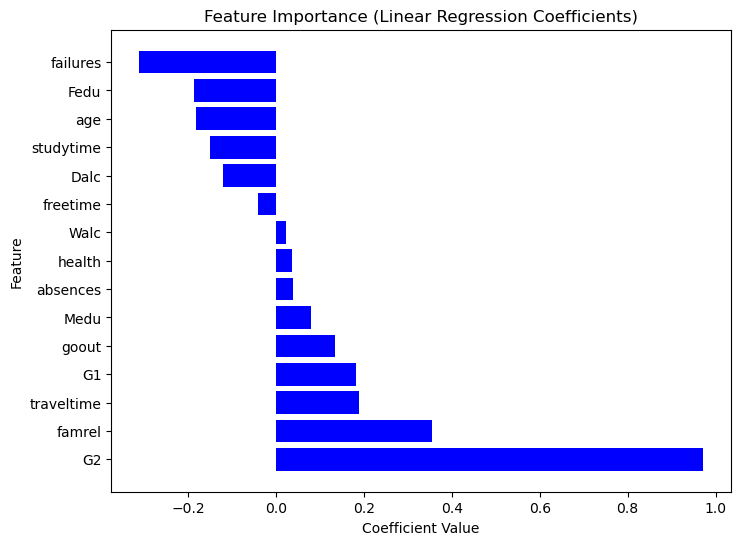

In [18]:
# Sort dataframe by coefficients.
coeff_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coeff_df_sorted["Feature"], coeff_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

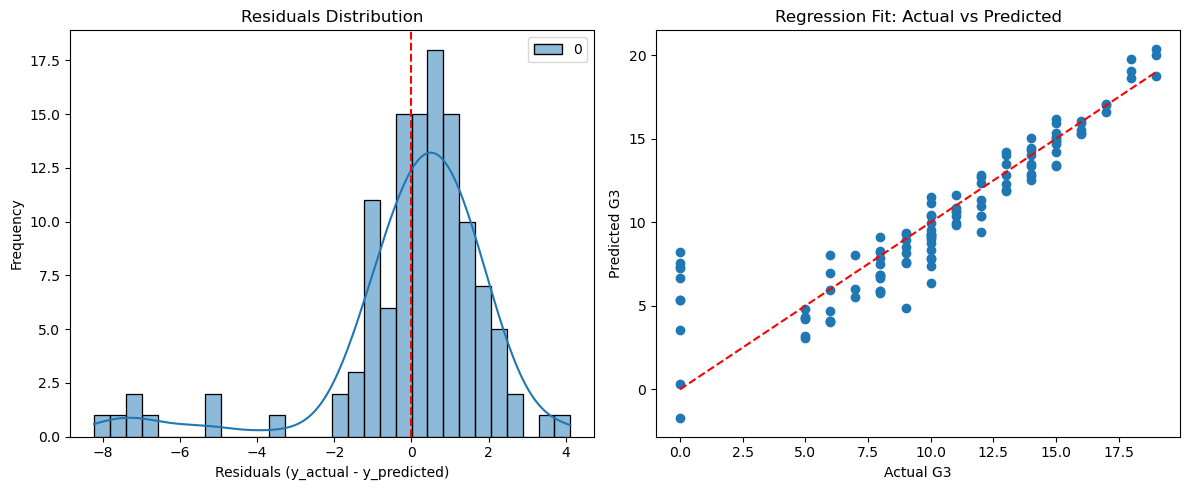

In [19]:
# Compute residuals.
residuals = y_test - y_pred

# Create plots.
plt.figure(figsize=(12,5))

# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

############# ------------------------- #############

# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")


# Show plots.
plt.tight_layout()
plt.show()

### 📊 Interpretation 

The **residuals distribution** indicate that errors are randomly distributed. 

- The model does not under- or over-fitting
- When the residuals follow a normal distribution, the model fits well
- If there is **skewness** or too heavy tails, it may suggest non-linear relationship not captured by the model

The **regression fit** compares actual vs. predicted values, with the red dashed line representing a perfect fit. 

- If points closely follow the line, predictions are accurate
- but if points scatte deviating the line, the relationship may not be truly linear, indicating limited predictive power (see the previous result when using only `studytime` as predictor)